Exploratory data analysis dataset
=================================

## CARGO LOS DATOS

In [12]:
import pandas as pd
import numpy as np
import os

ruta = 'coronary_disease.csv'

# Cargamos el archivo
df = pd.read_csv(ruta)

# Mostramos las primeras filas para verificar que todo esté bien
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## VEO CUANTOS MISSING VALUES HAY EN CADA CATEGORÍA

In [13]:
# 1. Ver el conteo exacto de valores faltantes por columna
missing_data = df.isnull().sum()

# 2. Calcular el porcentaje de valores faltantes (opcional pero muy útil)
missing_percentage = (df.isnull().sum() / len(df)) * 100

# 3. Crear una tabla resumen
resumen_missing = pd.DataFrame({
    'Valores Nulos': missing_data,
    'Porcentaje (%)': missing_percentage
})

# Mostrar solo las variables que tienen algún nulo
print(resumen_missing[resumen_missing['Valores Nulos'] > 0])
print(" ")
print("El data set contiene", len(df), "registros")

            Valores Nulos  Porcentaje (%)
education             105        2.477584
cigsPerDay             29        0.684285
BPMeds                 53        1.250590
totChol                50        1.179802
BMI                    19        0.448325
heartRate               1        0.023596
glucose               388        9.155262
 
El data set contiene 4238 registros


In [14]:
df_sin_nulls = df.copy()

## MISSING VALUES - glucose

- En los NULL de pacientes diabéticos pongo la mediana de glucosa de los diabéticos
- En los NULL de pacientes no diabéticos pongo la mediana de glucosa de los no diabéticos

In [15]:
# Rellenamos los nulos de 'glucose' basándonos en si son diabéticos o no
df_sin_nulls['glucose'] = df_sin_nulls['glucose'].fillna(df_sin_nulls.groupby('diabetes')['glucose'].transform('median'))

# Verificamos si aún quedan nulos en glucosa
print(f"Nulos en glucosa tras la imputación: {df_sin_nulls['glucose'].isnull().sum()}")

Nulos en glucosa tras la imputación: 0


## MISSING VALUES - cigsPerDay

- No hay NULLS en pacientes fumadores --> todo es 0
- En los NULLS de pacientes fumadores pongo la mediana de cigarros por dia de los fumadores

In [16]:
# Los que no fuman deberían tener 0 cigarrillos, los que sí fuman, la mediana de fumadores
df_sin_nulls['cigsPerDay'] = df_sin_nulls['cigsPerDay'].fillna(df_sin_nulls.groupby('currentSmoker')['cigsPerDay'].transform('median'))

print(f"Nulos en cigsPerDay tras la imputación: {df_sin_nulls['cigsPerDay'].isnull().sum()}")

Nulos en cigsPerDay tras la imputación: 0


## MISSING VALUES - education

Teniendo en cuenta la cantidad de NULLS que hay y el poco valor médico que aporta esta información para el modelo, se decide borrar esta columna

In [17]:
df_sin_nulls.drop(columns=['education'], inplace=True)

## MISSING VALUES - (BMI, heartRate)

Hay muy pocos missing values por lo que se decide eliminar esos registros del dataset ya que no afectará al total de los 4000 y pico registros que hay

In [18]:
df_sin_nulls.dropna(subset=['BMI', 'heartRate'], inplace=True)


## MISSING VALUES - BPMed

Si un paciente es hipertenso es probable que tome medicación, por lo que le asignaremos el valor de la moda del grupo de hipertensos y el de los no hipertensos el de los no hipertensos 

In [19]:
# Imputamos BPMeds con la moda de su grupo de hipertensión
df_sin_nulls['BPMeds'] = df_sin_nulls['BPMeds'].fillna(df_sin_nulls.groupby('prevalentHyp')['BPMeds'].transform(lambda x: x.mode()[0]))

## MISSING VALUES - totChol

En los missing values que tenemos, se rellena con la mediana de todos los otros datos

In [20]:
# Rellenamos con la mediana de toda la columna
df_sin_nulls['totChol'] = df_sin_nulls['totChol'].fillna(df_sin_nulls['totChol'].median())

## Comprobar distribuciones

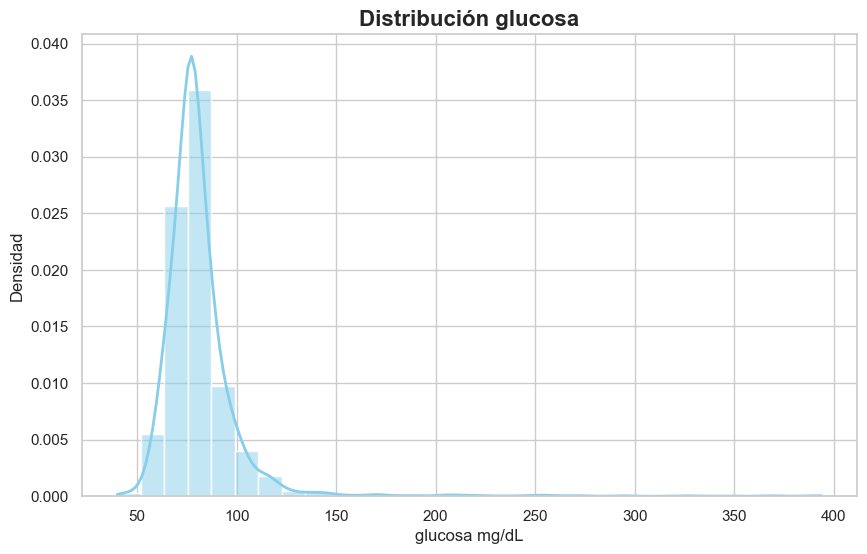

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo (equivalente a theme_minimal)
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(10, 6))

# Histograma con curva de densidad (KDE)
sns.histplot(df_sin_nulls['glucose'], 
             bins=30, 
             kde=True, 
             stat="density", 
             color="skyblue", 
             edgecolor="white",
             line_kws={"color": "red", "linewidth": 2})

# Personalización de etiquetas (equivalente a labs)
plt.title("Distribución glucosa", fontsize=16, fontweight='bold')
plt.xlabel("glucosa mg/dL", fontsize=12)
plt.ylabel("Densidad", fontsize=12)

# Mostrar gráfico
plt.show()